In [5]:
import datasets
ds = datasets.load_dataset('Asap7772/insight_evalsft_vllm_reward')
ds

README.md:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/840k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['joint_prompt', 'paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id', 'query', 'response', 'paper1_scores', 'paper1_scores_avg', 'paper2_scores', 'paper2_scores_avg', 'joint_scores', 'joint_scores_avg', 'no_context_scores', 'no_context_scores_avg', 'contrastive_loss', 'contrastive_loss_avg'],
        num_rows: 100
    })
})

In [6]:
import os
from itertools import combinations
def calc_passk(example):
    num_responses = len(example['contrastive_loss_avg'])
    passk_list = [0] * num_responses
    for i in range(1, num_responses + 1):
        num, total = 0, 0
        for comb in combinations(example['contrastive_loss_avg'], i):
            num += 1
            total += max(comb)
        passk_list[i-1] = total / num
    example['passk'] = passk_list
    return example

ds = ds.map(calc_passk, batched=False, num_proc=os.cpu_count())
ds


Map (num_proc=24):   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['joint_prompt', 'paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id', 'query', 'response', 'paper1_scores', 'paper1_scores_avg', 'paper2_scores', 'paper2_scores_avg', 'joint_scores', 'joint_scores_avg', 'no_context_scores', 'no_context_scores_avg', 'contrastive_loss', 'contrastive_loss_avg', 'passk'],
        num_rows: 100
    })
})

In [7]:
import numpy as np
passk = np.array(ds['train']['passk'])
passk.shape

(100, 8)

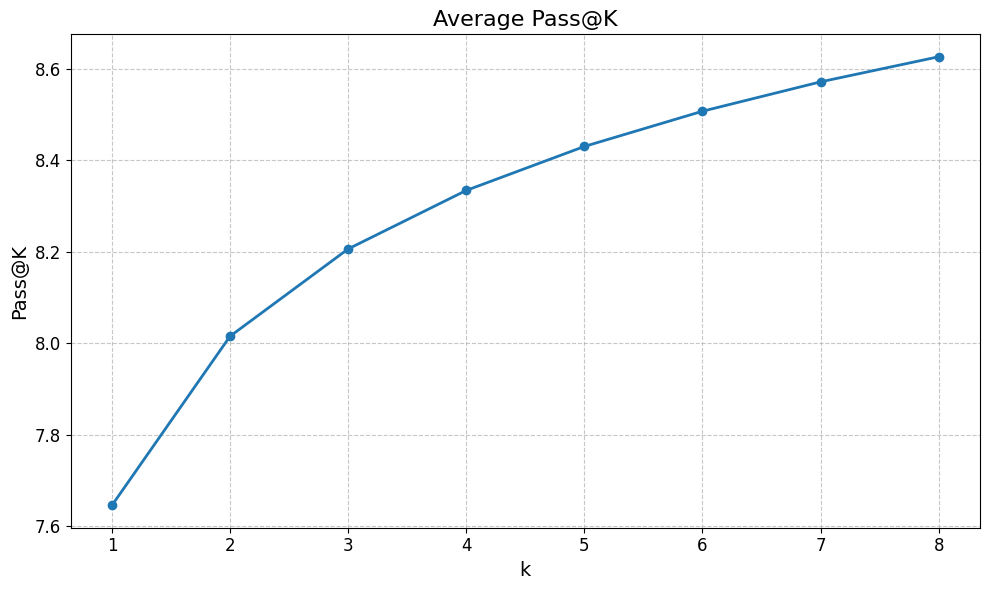

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average Pass@K
passk_avg = np.mean(passk, axis=0)

# Set up the figure
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(passk_avg) + 1), passk_avg, marker='o', linewidth=2)

# Styling
plt.title('Average Pass@K', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Pass@K', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()